In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/5g-nidd-dataset/Combined.csv


In [39]:
!pip install fancyimpute

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import requests, zipfile, io
import missingno as msno
import sklearn
import fancyimpute

In [41]:
ls /kaggle/input/

5g-nidd-dataset/


In [42]:
# input_path = '/kaggle/input/5g-nidd-dataset'
# output_path = '/kaggle/temp/5g-nidd-dataset'
# # Copy dataset into working directory
# shutil.copytree(input_path, output_path)

In [43]:
ls /kaggle/temp/

5g-nidd-dataset/


In [44]:
cd /kaggle/temp/5g-nidd-dataset

/kaggle/temp/5g-nidd-dataset


In [45]:
df = pd.read_csv('Combined.csv', low_memory=False)
df.describe()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat
count,1215890.000000,1215890.000000,1215890.000000,1215890.000000,1215890.000000,1215890.000000,1215890.000000,1215890.000000,1215676.000000,272823.000000,...,1215890.000000,242420.000000,177078.000000,114571.000000,2009.000000,278671.000000,230047.000000,1215890.000000,1215890.000000,1215890.000000
mean,315888.520114,40343.336930,1.364841,1.364841,1.364841,1.364841,1.364841,1.364841,0.864382,2.637593,...,499.966154,914968.879474,69513.358164,610.000000,610.000000,2044247683.019428,2146304531.597617,0.004670,0.000582,0.004088
std,194685.327627,37772.012502,1.691295,1.691295,1.691295,1.691295,1.691295,1.691295,12.518954,21.037454,...,56573.290204,4991475.670881,202116.364533,0.000000,0.000000,1233429312.640444,1243342448.155103,0.017428,0.013056,0.010536
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,610.000000,610.000000,123073.000000,33089.000000,0.000000,0.000000,0.000000
25%,151986.000000,8861.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,56576.000000,64768.000000,610.000000,610.000000,986247487.000000,1070928503.000000,0.000000,0.000000,0.000000
50%,303972.000000,27223.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,62592.000000,64896.000000,610.000000,610.000000,1994167345.000000,2151747461.000000,0.000000,0.000000,0.000000
75%,455958.000000,63316.000000,2.580399,2.580399,2.580399,2.580399,2.580399,2.580399,0.000000,0.000000,...,0.000000,64256.000000,65024.000000,610.000000,610.000000,3093609023.500000,3224407820.000000,0.000000,0.000000,0.000000
max,728315.000000,137210.000000,19.920630,19.920630,19.920630,19.920630,19.920630,19.920630,224.000000,186.000000,...,26000000.000000,33553920.000000,16776960.000000,610.000000,610.000000,4294967295.000000,4294956058.000000,1.051236,1.024680,0.266729


In [46]:
df.head()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,Benign,Benign,Benign
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,Benign,Benign,Benign
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,Benign,Benign,Benign
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,Benign,Benign,Benign
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,Benign,Benign,Benign


In [47]:
df.shape

(1215890, 52)

In [48]:
pd.set_option('float_format', '{:f}'.format)
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["xtick.labelsize"] = 7
pd.set_option('future.no_silent_downcasting', True)

In [49]:
# Numeric columns
df.select_dtypes('number').head()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,0.000000,0.000000,...,3.401347,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,0.000000,0.000000,...,4.001571,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,0.000000,0.000000,...,3.600394,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000


In [50]:
# Categorical columns
df.select_dtypes('object').head()

,Proto,sDSb,dDSb,Cause,State,Label,Attack Type,Attack Tool
0,icmp,cs0,NaN,Start,ECO,Benign,Benign,Benign
1,icmp,cs0,NaN,Start,ECO,Benign,Benign,Benign
2,udp,cs0,cs0,Start,CON,Benign,Benign,Benign
3,udp,cs0,cs0,Start,CON,Benign,Benign,Benign
4,udp,cs0,cs0,Start,CON,Benign,Benign,Benign


In [51]:
# Are there missing values in columns?
df.isna().any()

Unnamed: 0     False
Seq            False
Dur            False
RunTime        False
Mean           False
Sum            False
Min            False
Max            False
Proto          False
sTos            True
dTos            True
sDSb            True
dDSb            True
sTtl            True
dTtl            True
sHops           True
dHops           True
Cause          False
TotPkts        False
SrcPkts        False
DstPkts        False
TotBytes       False
SrcBytes       False
DstBytes       False
Offset         False
sMeanPktSz     False
dMeanPktSz     False
Load           False
SrcLoad        False
DstLoad        False
Loss           False
SrcLoss        False
DstLoss        False
pLoss          False
SrcGap          True
DstGap          True
Rate           False
SrcRate        False
DstRate        False
State          False
SrcWin          True
DstWin          True
sVid            True
dVid            True
SrcTCPBase      True
DstTCPBase      True
TcpRtt         False
SynAck       

In [52]:
# Missing value count of columns
df.isna().sum()

Unnamed: 0           0
Seq                  0
Dur                  0
RunTime              0
Mean                 0
Sum                  0
Min                  0
Max                  0
Proto                0
sTos               214
dTos            943067
sDSb               214
dDSb            943067
sTtl               214
dTtl            943067
sHops              214
dHops           943067
Cause                0
TotPkts              0
SrcPkts              0
DstPkts              0
TotBytes             0
SrcBytes             0
DstBytes             0
Offset               0
sMeanPktSz           0
dMeanPktSz           0
Load                 0
SrcLoad              0
DstLoad              0
Loss                 0
SrcLoss              0
DstLoss              0
pLoss                0
SrcGap          937219
DstGap          937219
Rate                 0
SrcRate              0
DstRate              0
State                0
SrcWin          973470
DstWin         1038812
sVid           1101319
dVid       

In [53]:
# Get duplicated rows
print(df[df.duplicated()])

def drop_duplicated_rows(df):
    df.drop_duplicates(inplace=True)
    return df

df = drop_duplicated_rows(df)
print(df[df.duplicated()])

        Unnamed: 0  Seq      Dur  RunTime     Mean      Sum      Min      Max  \
728316           0    1 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       Proto     sTos  ...  sVid dVid SrcTCPBase  DstTCPBase   TcpRtt  \
728316  icmp 0.000000  ...   NaN  NaN        NaN         NaN 0.000000   

         SynAck   AckDat   Label  Attack Type  Attack Tool  
728316 0.000000 0.000000  Benign       Benign       Benign  

[1 rows x 52 columns]
Empty DataFrame
Columns: [Unnamed: 0, Seq, Dur, RunTime, Mean, Sum, Min, Max, Proto, sTos, dTos, sDSb, dDSb, sTtl, dTtl, sHops, dHops, Cause, TotPkts, SrcPkts, DstPkts, TotBytes, SrcBytes, DstBytes, Offset, sMeanPktSz, dMeanPktSz, Load, SrcLoad, DstLoad, Loss, SrcLoss, DstLoss, pLoss, SrcGap, DstGap, Rate, SrcRate, DstRate, State, SrcWin, DstWin, sVid, dVid, SrcTCPBase, DstTCPBase, TcpRtt, SynAck, AckDat, Label, Attack Type, Attack Tool]
Index: []

[0 rows x 52 columns]


<Axes: >

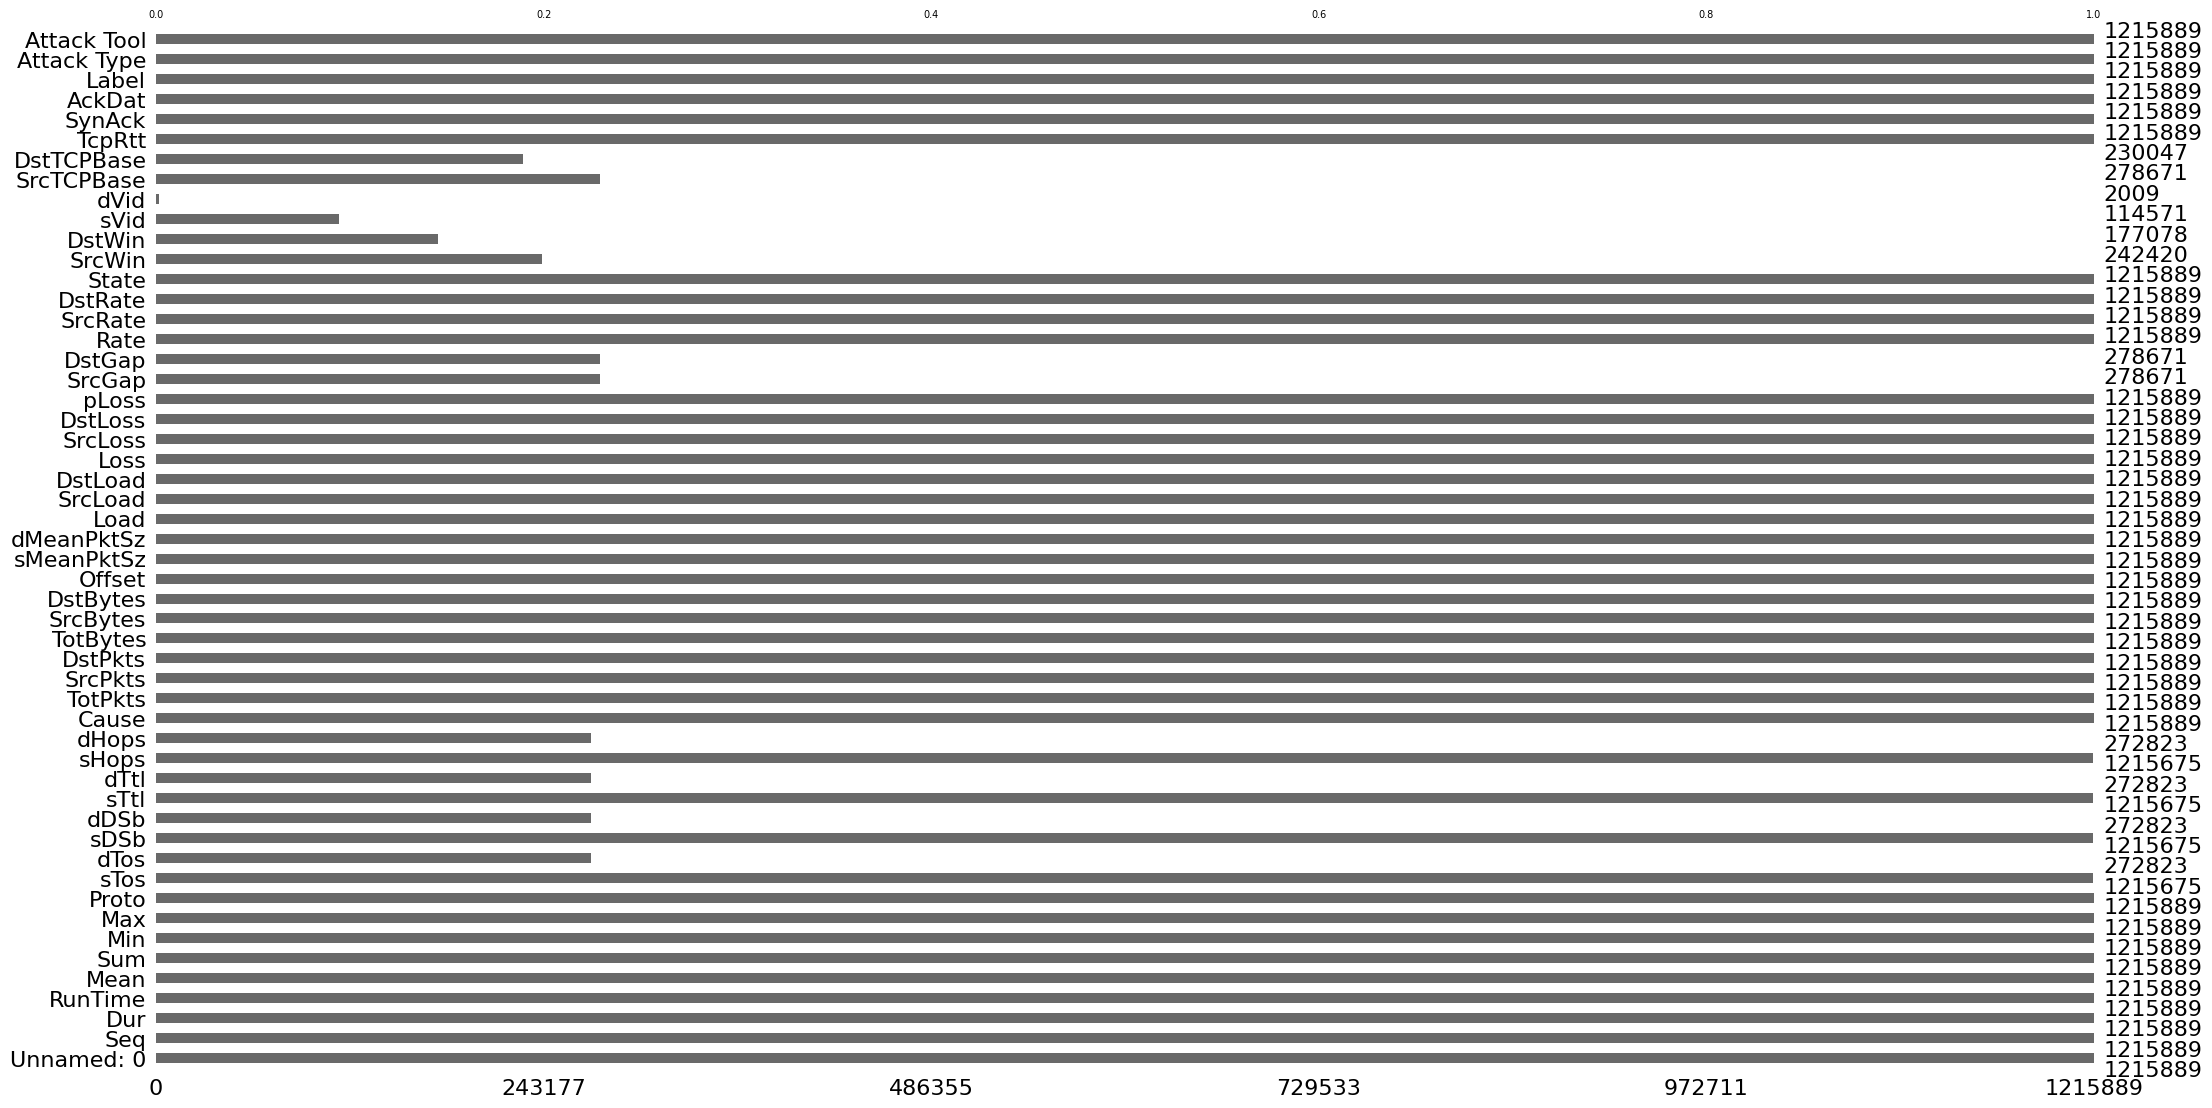

In [54]:
msno.bar(df) 

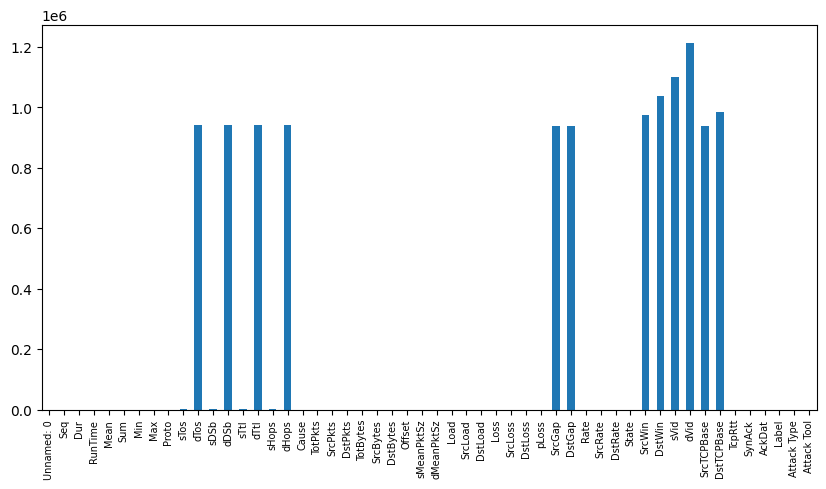

In [55]:
df.isna().sum().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

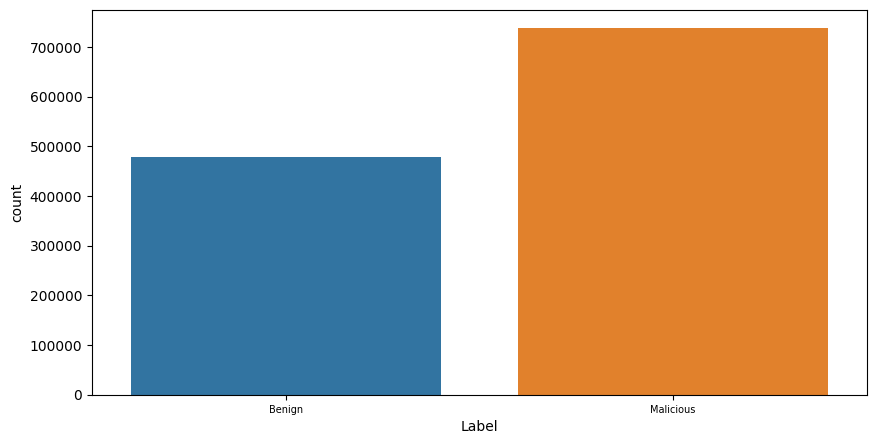

In [56]:
sns.countplot(x='Label', data=df)
plt.show()

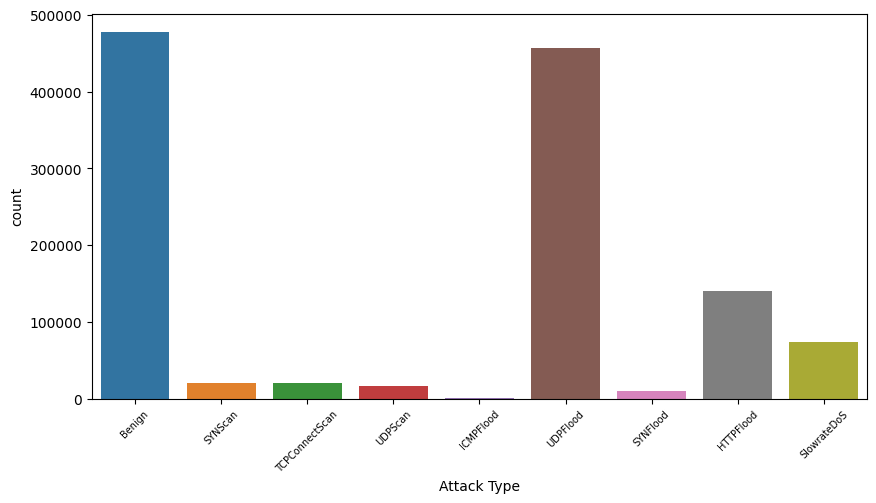

In [57]:
sns.countplot(x='Attack Type', data=df)
plt.xticks(rotation=45)
plt.show()

In [58]:
def view_stats(i, df, col):
    print(f"Column {i} name: {col} \n")
    print(f"Column dtype: {df[col].dtype} \n")
    print(f"Value Description: \n\n{df[col].describe()} \n")
    print(f"Missing value count: {df[col].isna().sum()} \n")
    print(f"Missing value percentage: {100*df[col].isna().sum()/df[col].size} \n")
    print(f"Unique values Count:  {df[col].nunique()} \n")
    print(f"Unique values: \n\n{df[col].value_counts(sort=True)} \n")
    print(f"Unique values Percentage: \n\n{df[col].value_counts(sort=True, normalize=True)} \n")
    print(f"Type distribution: \n\n{df.groupby([col, 'Attack Type']).agg(count_num=('Attack Type', 'count')).sort_values('count_num', ascending=False)} \n")
    print('------------------------------------------------------')

In [59]:
categorical_cols = df.select_dtypes('object').columns
categorical_cols[:-3]

Index(['Proto', 'sDSb', 'dDSb', 'Cause', 'State'], dtype='object')

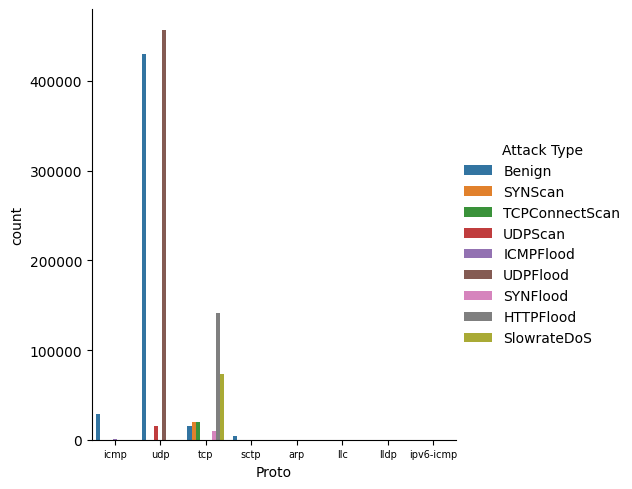

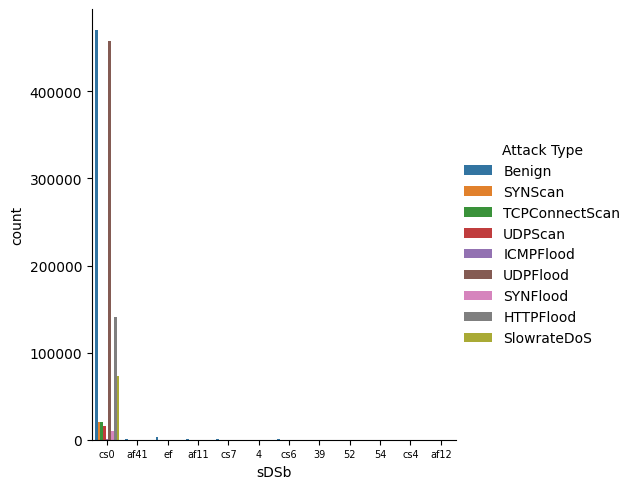

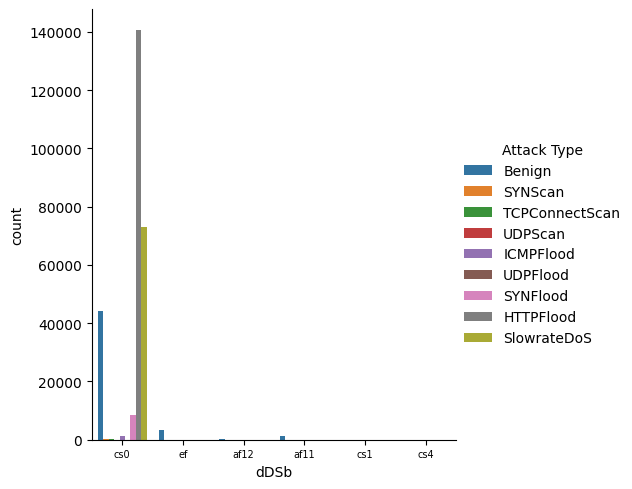

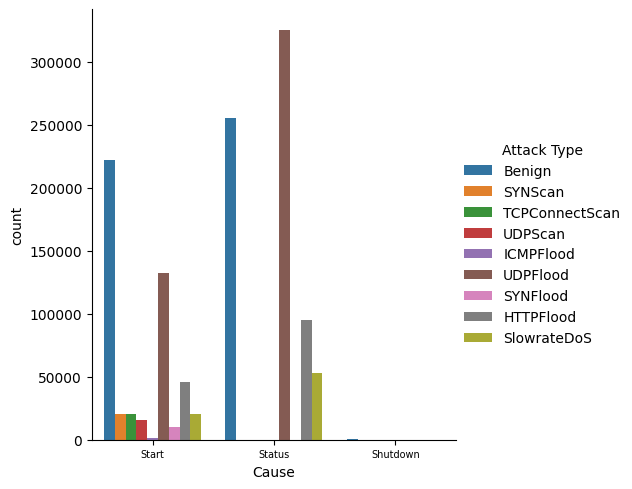

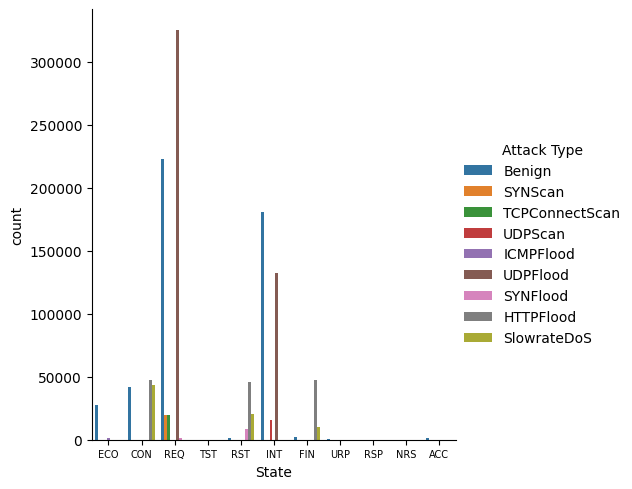

In [60]:
for col in categorical_cols[:-3]:
    sns.catplot(x=col, data=df, kind='count', hue='Attack Type')
    plt.show()

In [61]:
df.columns[df.isna().any()]

Index(['sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'sHops', 'dHops',
       'SrcGap', 'DstGap', 'SrcWin', 'DstWin', 'sVid', 'dVid', 'SrcTCPBase',
       'DstTCPBase'],
      dtype='object')

In [62]:
def view_missing_cols(i, col):
    
#     df_col_non_missing_mask = df[col].apply(lambda x: ~np.isnan(x))
#     df_col_missing_mask = df[col].apply(lambda x: np.isnan(x))

    df_col_non_missing_mask = ~df[col].isna()
    df_col_missing_mask = df[col].isna()
    
    view_stats(i, df, col)
    print('\n------------Attack Type distribution of All rows with col value missing---------------\n')
    
    # Attack Type distribution of All rows with col value missing
    print(df[df_col_missing_mask]['Attack Type'].value_counts())

    print('\n-----------Attack Type distribution of All rows with col present----------------\n')

    # Attack Type distribution of All rows with col present
    print(df[df_col_non_missing_mask]['Attack Type'].value_counts())

    if df[col].nunique() < 40:
        print('\n----------Plot with non missing col value based on Attack type-----------------\n')

        plot = sns.catplot(x=col, data=df[df_col_non_missing_mask], kind='count', hue='Attack Type')
        plt.xticks(rotation=30)
        plt.show()

        print('\n-----------Plot with Attack Types based on non missing col----------------\n')

        sns.catplot(x='Attack Type', data=df[df_col_non_missing_mask], kind='count', hue=col)
        plt.xticks(rotation=45)
        plt.show()    
    
    print('\n--------------------------------------------------------------\n')
    print('\n--------------------------------------------------------------\n')

Column 1 name: sTos 

Column dtype: float64 

Value Description: 

count   1215675.000000
mean          0.864383
std          12.518959
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         224.000000
Name: sTos, dtype: float64 

Missing value count: 214 

Missing value percentage: 0.01760029081602021 

Unique values Count:  12 

Unique values: 

sTos
0.000000      1209215
186.000000       3538
40.000000         789
192.000000        640
224.000000        528
136.000000        515
208.000000        144
48.000000         137
128.000000         93
16.000000          74
157.000000          1
216.000000          1
Name: count, dtype: int64 

Unique values Percentage: 

sTos
0.000000     0.994686
186.000000   0.002910
40.000000    0.000649
192.000000   0.000526
224.000000   0.000434
136.000000   0.000424
208.000000   0.000118
48.000000    0.000113
128.000000   0.000077
16.000000    0.000061
157.000000   0.000001
216.000000   0.000001
Name: p

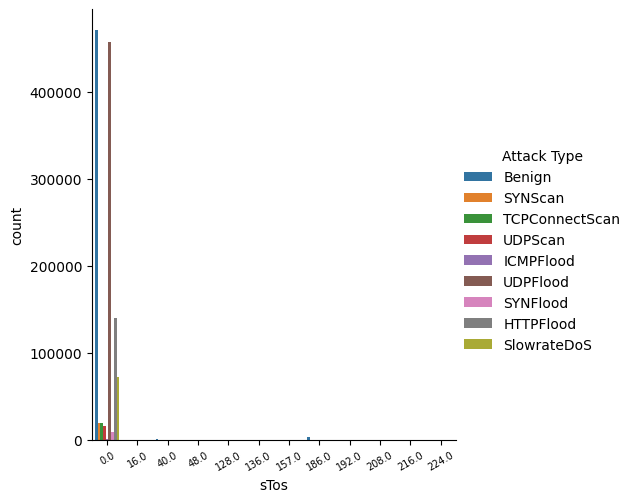


-----------Plot with Attack Types based on non missing col----------------



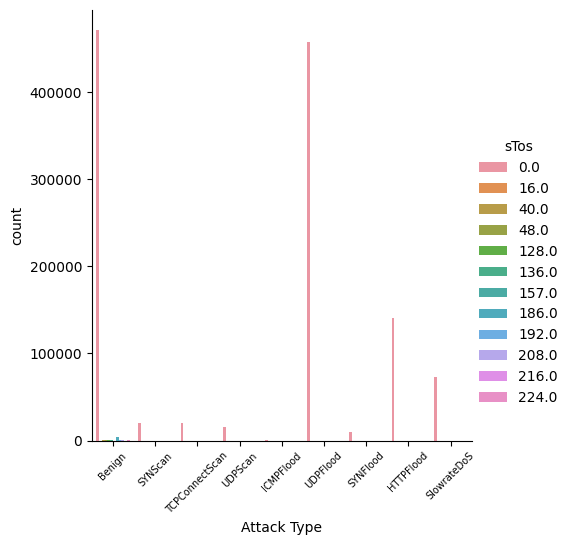


--------------------------------------------------------------


--------------------------------------------------------------

Column 2 name: dTos 

Column dtype: float64 

Value Description: 

count   272823.000000
mean         2.637593
std         21.037454
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        186.000000
Name: dTos, dtype: float64 

Missing value count: 943066 

Missing value percentage: 77.56184980701363 

Unique values Count:  7 

Unique values: 

dTos
0.000000      267523
186.000000      2914
40.000000       1413
184.000000       550
48.000000        390
32.000000         32
128.000000         1
Name: count, dtype: int64 

Unique values Percentage: 

dTos
0.000000     0.980573
186.000000   0.010681
40.000000    0.005179
184.000000   0.002016
48.000000    0.001429
32.000000    0.000117
128.000000   0.000004
Name: proportion, dtype: float64 

Type distribution: 

                           count_num
dTos       Attack T

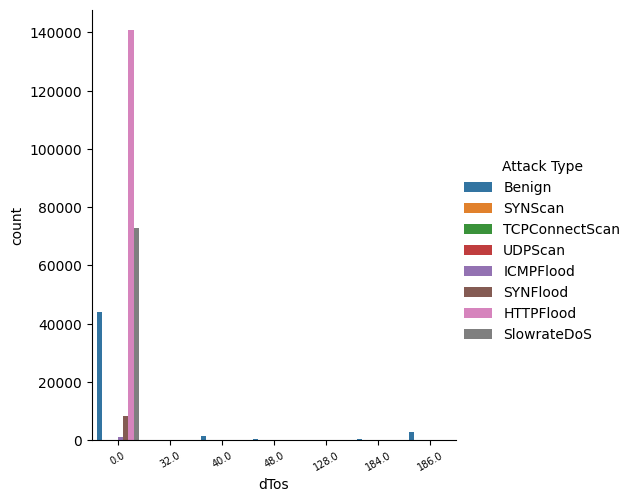


-----------Plot with Attack Types based on non missing col----------------



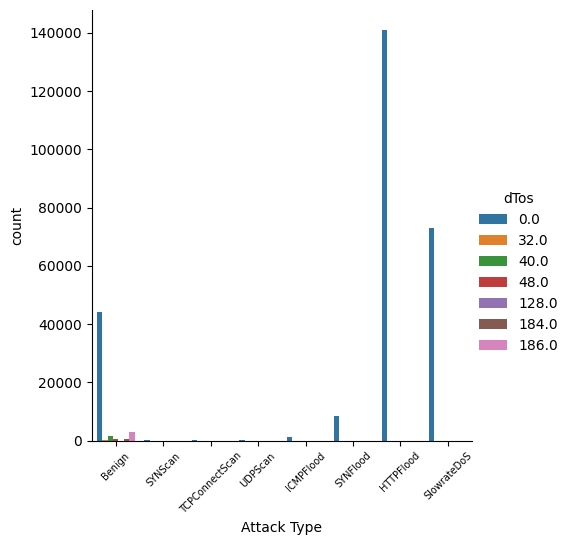


--------------------------------------------------------------


--------------------------------------------------------------

Column 3 name: sDSb 

Column dtype: object 

Value Description: 

count     1215675
unique         12
top           cs0
freq      1209215
Name: sDSb, dtype: object 

Missing value count: 214 

Missing value percentage: 0.01760029081602021 

Unique values Count:  12 

Unique values: 

sDSb
cs0     1209215
ef         3538
af11        789
cs6         640
cs7         528
af41        515
52          144
af12        137
cs4          93
4            74
39            1
54            1
Name: count, dtype: int64 

Unique values Percentage: 

sDSb
cs0    0.994686
ef     0.002910
af11   0.000649
cs6    0.000526
cs7    0.000434
af41   0.000424
52     0.000118
af12   0.000113
cs4    0.000077
4      0.000061
39     0.000001
54     0.000001
Name: proportion, dtype: float64 

Type distribution: 

                     count_num
sDSb Attack Type              
cs0  Benign      

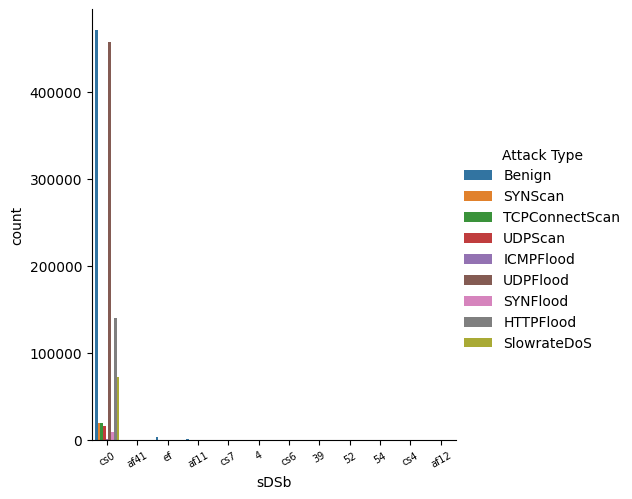


-----------Plot with Attack Types based on non missing col----------------



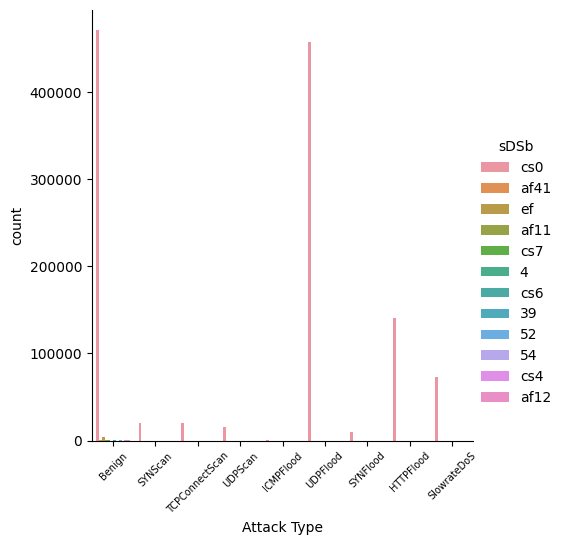


--------------------------------------------------------------


--------------------------------------------------------------

Column 4 name: dDSb 

Column dtype: object 

Value Description: 

count     272823
unique         6
top          cs0
freq      267523
Name: dDSb, dtype: object 

Missing value count: 943066 

Missing value percentage: 77.56184980701363 

Unique values Count:  6 

Unique values: 

dDSb
cs0     267523
ef        3464
af11      1413
af12       390
cs1         32
cs4          1
Name: count, dtype: int64 

Unique values Percentage: 

dDSb
cs0    0.980573
ef     0.012697
af11   0.005179
af12   0.001429
cs1    0.000117
cs4    0.000004
Name: proportion, dtype: float64 

Type distribution: 

                     count_num
dDSb Attack Type              
cs0  HTTPFlood          140807
     SlowrateDoS         72919
     Benign              44094
     SYNFlood             8336
ef   Benign               3464
af11 Benign               1413
cs0  ICMPFlood            1154
af

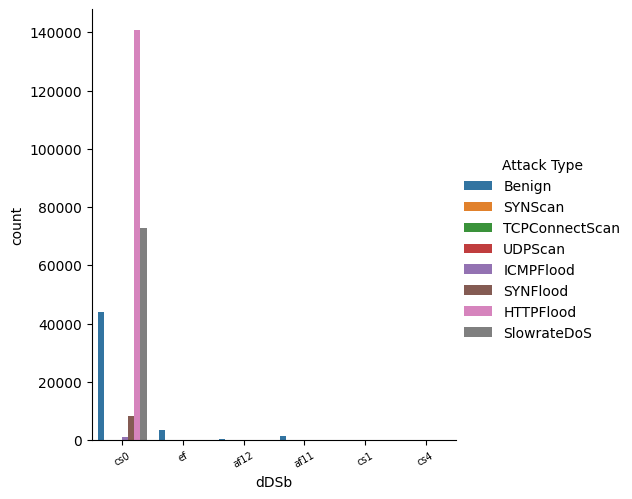


-----------Plot with Attack Types based on non missing col----------------



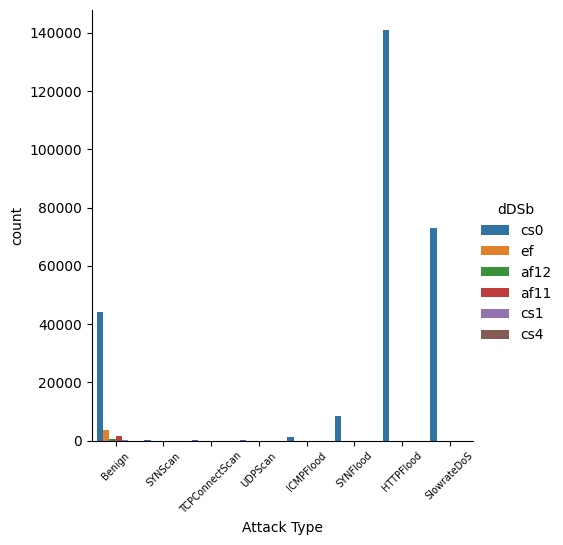


--------------------------------------------------------------


--------------------------------------------------------------

Column 5 name: sTtl 

Column dtype: float64 

Value Description: 

count   1215675.000000
mean         81.454487
std          55.926746
min          36.000000
25%          63.000000
50%          63.000000
75%          63.000000
max         255.000000
Name: sTtl, dtype: float64 

Missing value count: 214 

Missing value percentage: 0.01760029081602021 

Unique values Count:  35 

Unique values: 

sTtl
63.000000     981042
249.000000    111726
64.000000      34553
58.000000      29163
117.000000     13722
255.000000      5309
52.000000       2068
53.000000       2065
47.000000       1747
45.000000       1641
37.000000       1622
36.000000       1610
38.000000       1607
51.000000       1605
39.000000       1603
48.000000       1598
56.000000       1596
40.000000       1585
49.000000       1578
55.000000       1562
46.000000       1560
50.000000       1560
42.0

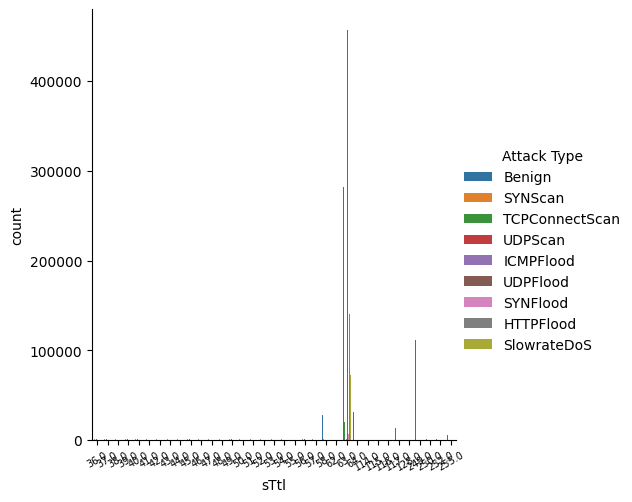


-----------Plot with Attack Types based on non missing col----------------



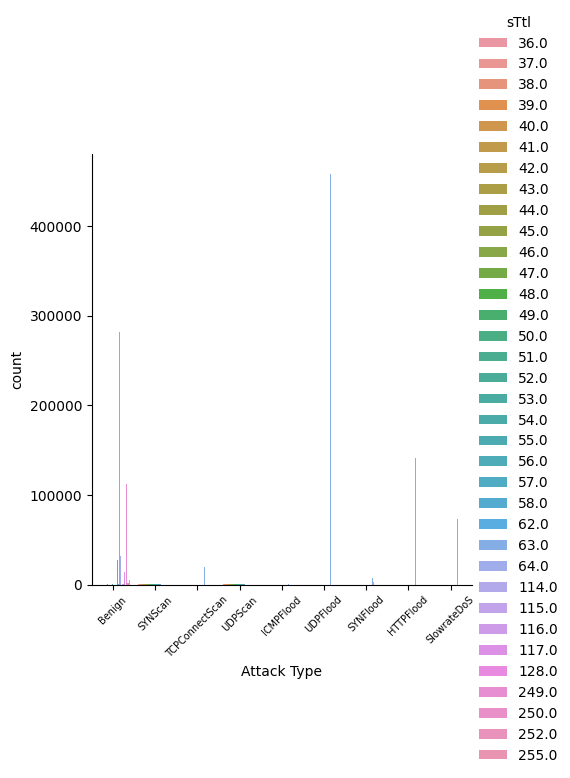


--------------------------------------------------------------


--------------------------------------------------------------

Column 6 name: dTtl 

Column dtype: float64 

Value Description: 

count   272823.000000
mean        65.323638
std         28.091431
min         37.000000
25%         59.000000
50%         59.000000
75%         59.000000
max        255.000000
Name: dTtl, dtype: float64 

Missing value count: 943066 

Missing value percentage: 77.56184980701363 

Unique values Count:  33 

Unique values: 

dTtl
59.000000     223429
64.000000      20061
117.000000     11527
53.000000       4555
52.000000       3363
255.000000      2851
62.000000       2223
63.000000       1547
250.000000      1413
116.000000       772
252.000000       596
115.000000       135
51.000000         91
54.000000         58
47.000000         44
48.000000         29
50.000000         21
43.000000         20
41.000000         17
114.000000        15
42.000000         14
46.000000          7
44.000000  

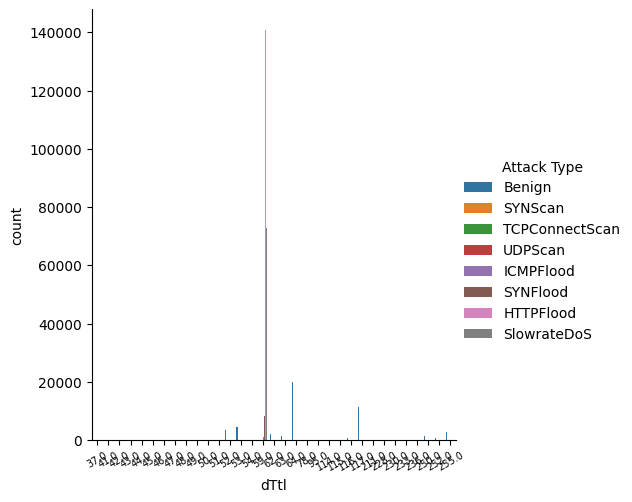


-----------Plot with Attack Types based on non missing col----------------



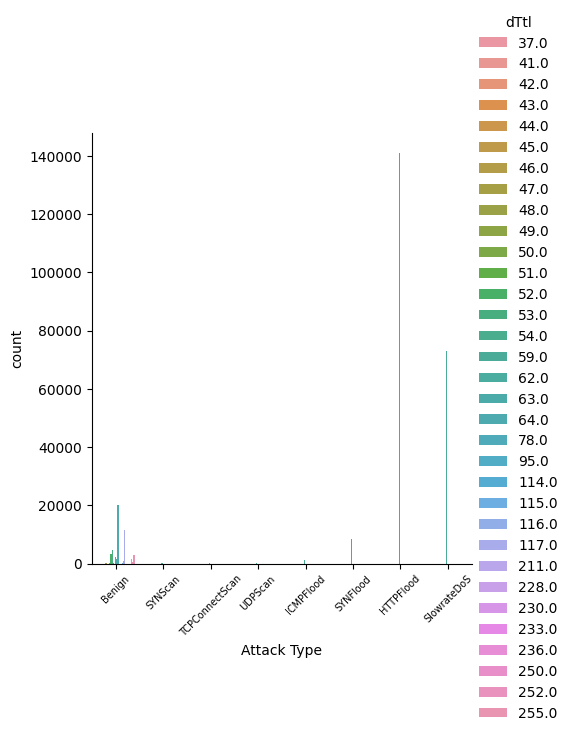


--------------------------------------------------------------


--------------------------------------------------------------

Column 7 name: sHops 

Column dtype: float64 

Value Description: 

count   1215675.000000
mean          2.257097
std           3.564295
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          28.000000
Name: sHops, dtype: float64 

Missing value count: 214 

Missing value percentage: 0.01760029081602021 

Unique values Count:  27 

Unique values: 

sHops
1.000000     986351
7.000000     113249
0.000000      34579
6.000000      30480
11.000000     15787
12.000000      2676
13.000000      1961
17.000000      1747
19.000000      1641
14.000000      1625
27.000000      1622
28.000000      1610
26.000000      1607
25.000000      1603
16.000000      1598
8.000000       1596
24.000000      1585
15.000000      1578
9.000000       1562
18.000000      1560
22.000000      1547
10.000000      1542
20.000000      1540
21.

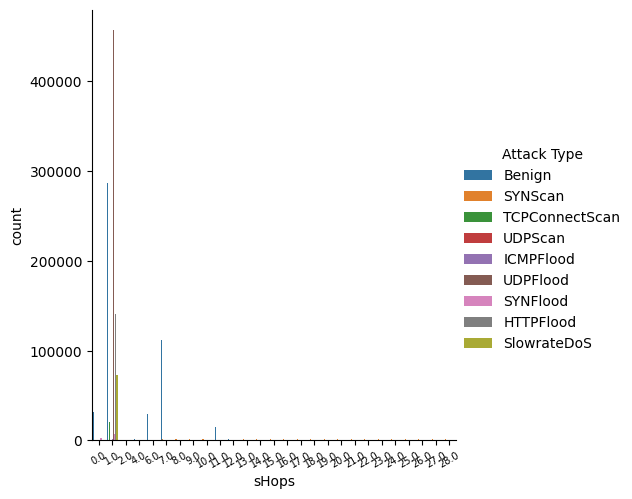


-----------Plot with Attack Types based on non missing col----------------



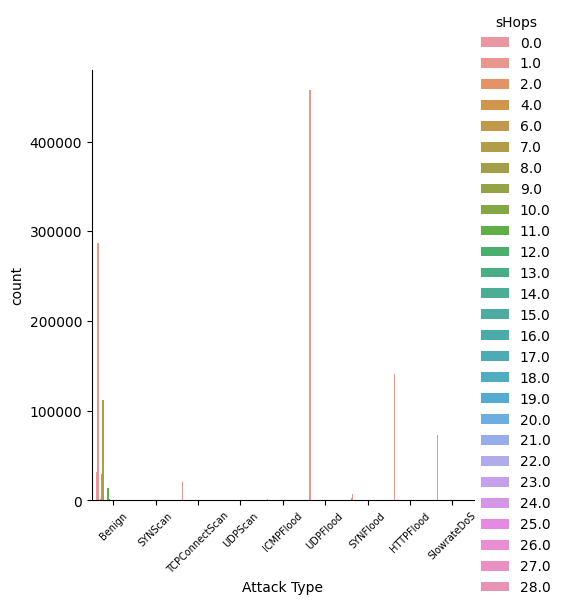


--------------------------------------------------------------


--------------------------------------------------------------

Column 8 name: dHops 

Column dtype: float64 

Value Description: 

count   272823.000000
mean         5.024214
std          2.294874
min          0.000000
25%          5.000000
50%          5.000000
75%          5.000000
max         50.000000
Name: dHops, dtype: float64 

Missing value count: 943066 

Missing value percentage: 77.56184980701363 

Unique values Count:  26 

Unique values: 

dHops
5.000000     223429
0.000000      20061
11.000000     16082
1.000000       4398
12.000000      4135
2.000000       2223
6.000000       1413
4.000000        596
13.000000       226
10.000000        58
17.000000        44
14.000000        36
16.000000        29
21.000000        20
23.000000        18
22.000000        14
20.000000         9
18.000000         7
15.000000         6
27.000000         6
19.000000         4
33.000000         2
45.000000         2
50.000000 

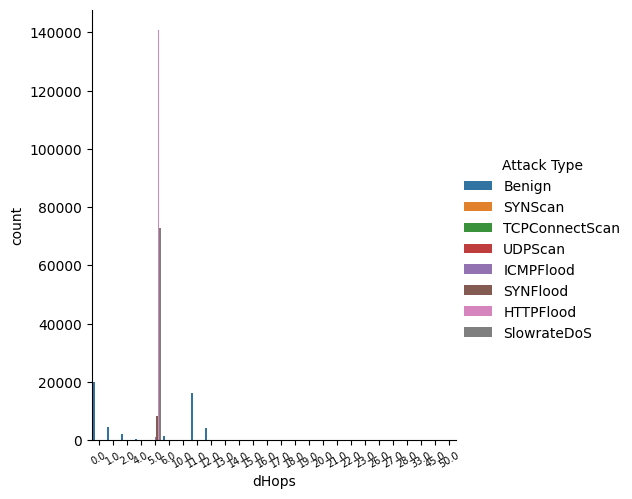


-----------Plot with Attack Types based on non missing col----------------



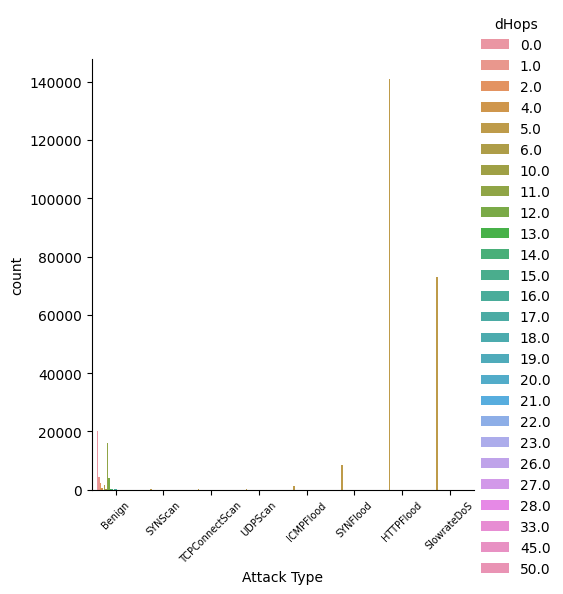


--------------------------------------------------------------


--------------------------------------------------------------

Column 9 name: SrcGap 

Column dtype: float64 

Value Description: 

count   278671.000000
mean         0.052287
std         10.516885
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3064.000000
Name: SrcGap, dtype: float64 

Missing value count: 937218 

Missing value percentage: 77.08088485050855 

Unique values Count:  15 

Unique values: 

SrcGap
0.000000       278650
1.000000            6
3064.000000         2
535.000000          2
560.000000          1
2555.000000         1
145.000000          1
534.000000          1
99.000000           1
798.000000          1
1833.000000         1
96.000000           1
536.000000          1
131.000000          1
80.000000           1
Name: count, dtype: int64 

Unique values Percentage: 

SrcGap
0.000000      0.999925
1.000000      0.000022
3064.000000   0.000007
535.0

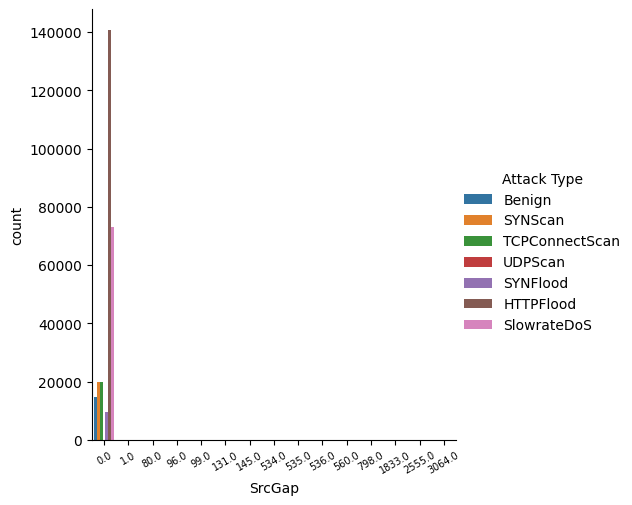


-----------Plot with Attack Types based on non missing col----------------



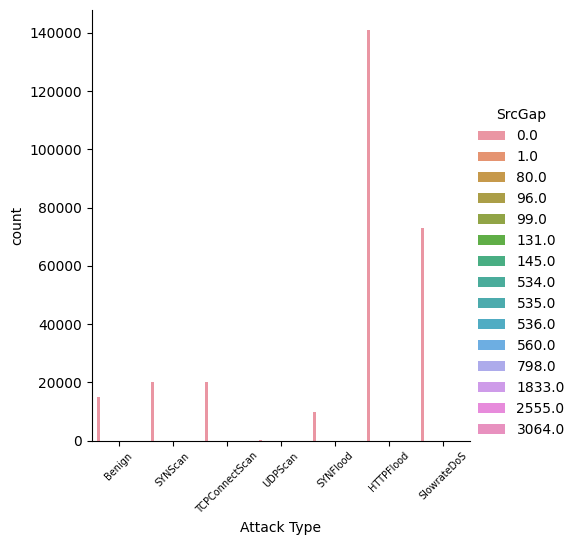


--------------------------------------------------------------


--------------------------------------------------------------

Column 10 name: DstGap 

Column dtype: float64 

Value Description: 

count   278671.000000
mean         1.150898
std        139.820039
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      57387.000000
Name: DstGap, dtype: float64 

Missing value count: 937218 

Missing value percentage: 77.08088485050855 

Unique values Count:  17 

Unique values: 

DstGap
0.000000        278601
2736.000000         20
1368.000000         17
4104.000000         10
5472.000000          7
9576.000000          2
6840.000000          2
2451.000000          2
1083.000000          2
32976.000000         1
8208.000000          1
1447.000000          1
5187.000000          1
6555.000000          1
7923.000000          1
3819.000000          1
57387.000000         1
Name: count, dtype: int64 

Unique values Percentage: 

DstGap
0.000000    

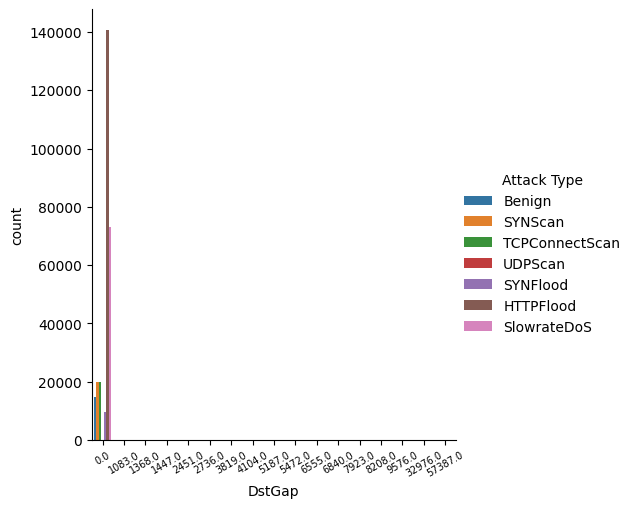


-----------Plot with Attack Types based on non missing col----------------



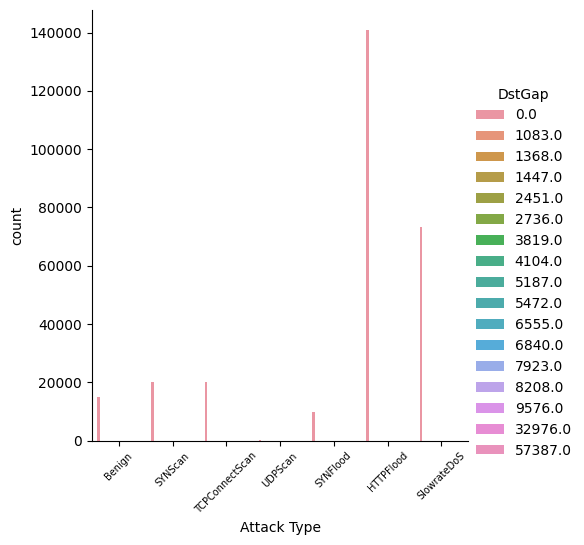


--------------------------------------------------------------


--------------------------------------------------------------

Column 11 name: SrcWin 

Column dtype: float64 

Value Description: 

count     242420.000000
mean      914968.879474
std      4991475.670881
min            0.000000
25%        56576.000000
50%        62592.000000
75%        64256.000000
max     33553920.000000
Name: SrcWin, dtype: float64 

Missing value count: 973469 

Missing value percentage: 80.06232476813261 

Unique values Count:  1087 

Unique values: 

SrcWin
64256.000000      52240
0.000000          35765
56832.000000      35325
64128.000000      24950
62848.000000      24301
                  ...  
1448960.000000        1
672.000000            1
821248.000000         1
1539584.000000        1
132096.000000         1
Name: count, Length: 1087, dtype: int64 

Unique values Percentage: 

SrcWin
64256.000000     0.215494
0.000000         0.147533
56832.000000     0.145718
64128.000000     0.102921
628

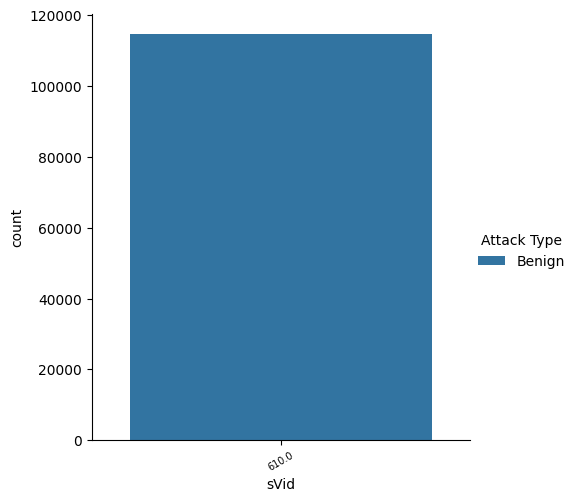


-----------Plot with Attack Types based on non missing col----------------



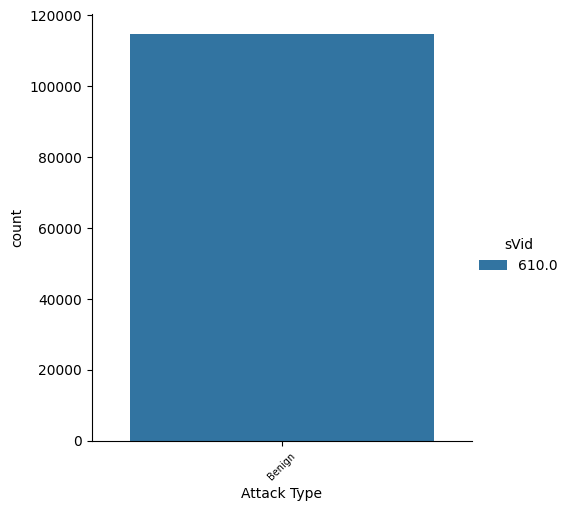


--------------------------------------------------------------


--------------------------------------------------------------

Column 14 name: dVid 

Column dtype: float64 

Value Description: 

count   2009.000000
mean     610.000000
std        0.000000
min      610.000000
25%      610.000000
50%      610.000000
75%      610.000000
max      610.000000
Name: dVid, dtype: float64 

Missing value count: 1213880 

Missing value percentage: 99.8347711016384 

Unique values Count:  1 

Unique values: 

dVid
610.000000    2009
Name: count, dtype: int64 

Unique values Percentage: 

dVid
610.000000   1.000000
Name: proportion, dtype: float64 

Type distribution: 

                        count_num
dVid       Attack Type           
610.000000 Benign            2009 

------------------------------------------------------

------------Attack Type distribution of All rows with col value missing---------------

Attack Type
Benign            475727
UDPFlood          457340
HTTPFlood         140

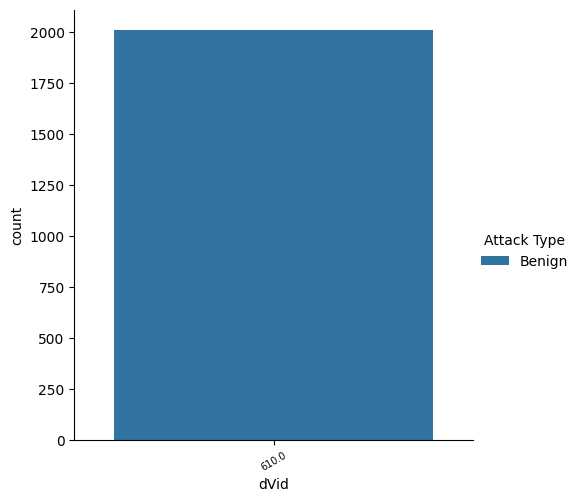


-----------Plot with Attack Types based on non missing col----------------



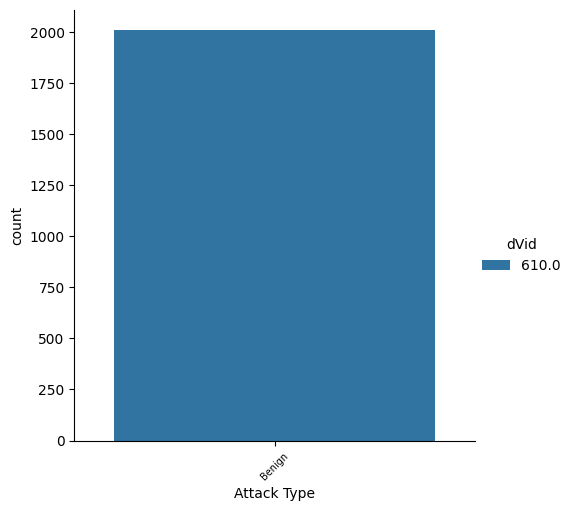


--------------------------------------------------------------


--------------------------------------------------------------

Column 15 name: SrcTCPBase 

Column dtype: float64 

Value Description: 

count       278671.000000
mean    2044247683.019428
std     1233429312.640444
min         123073.000000
25%      986247487.000000
50%     1994167345.000000
75%     3093609023.500000
max     4294967295.000000
Name: SrcTCPBase, dtype: float64 

Missing value count: 937218 

Missing value percentage: 77.08088485050855 

Unique values Count:  203756 

Unique values: 

SrcTCPBase
469337034.000000     1000
2715121370.000000    1000
867637886.000000     1000
1668789075.000000    1000
17369830.000000      1000
                     ... 
2282491040.000000       1
4057868734.000000       1
615259073.000000        1
2813210291.000000       1
2237372583.000000       1
Name: count, Length: 203756, dtype: int64 

Unique values Percentage: 

SrcTCPBase
469337034.000000    0.003588
2715121370.000000   

In [63]:
# numeric_cols_df = df.select_dtypes('number')

# for i, col in enumerate(numeric_cols_df.columns[numeric_cols_df.isna().any()]):
#     view_missing_cols(i+1, col)

for i, col in enumerate(df.columns[df.isna().any()]):
    view_missing_cols(i+1, col)

In [64]:
df.groupby(['sDSb', 'Attack Type']).agg(count_num=('Attack Type', 'count')).sort_values('count_num', ascending=False)

count_num
sDSb Attack Type              
cs0  Benign             471062
     UDPFlood           457340
     HTTPFlood          140812
     SlowrateDoS         73124
     TCPConnectScan      20052
     SYNScan             20043
     UDPScan             15906
     SYNFlood             9721
ef   Benign               3538
cs0  ICMPFlood            1155
af11 Benign                789
cs6  Benign                640
cs7  Benign                528
af41 Benign                515
52   Benign                144
af12 Benign                137
cs4  Benign                 93
4    Benign                 74
54   Benign                  1
39   Benign                  1

In [65]:
df.groupby(['dDSb', 'Attack Type']).agg(count_num=('Attack Type', 'count')).sort_values('count_num', ascending=False)

count_num
dDSb Attack Type              
cs0  HTTPFlood          140807
     SlowrateDoS         72919
     Benign              44094
     SYNFlood             8336
ef   Benign               3464
af11 Benign               1413
cs0  ICMPFlood            1154
af12 Benign                390
cs0  TCPConnectScan         91
     SYNScan                83
     UDPScan                39
cs1  Benign                 32
cs4  Benign                  1

<Axes: >

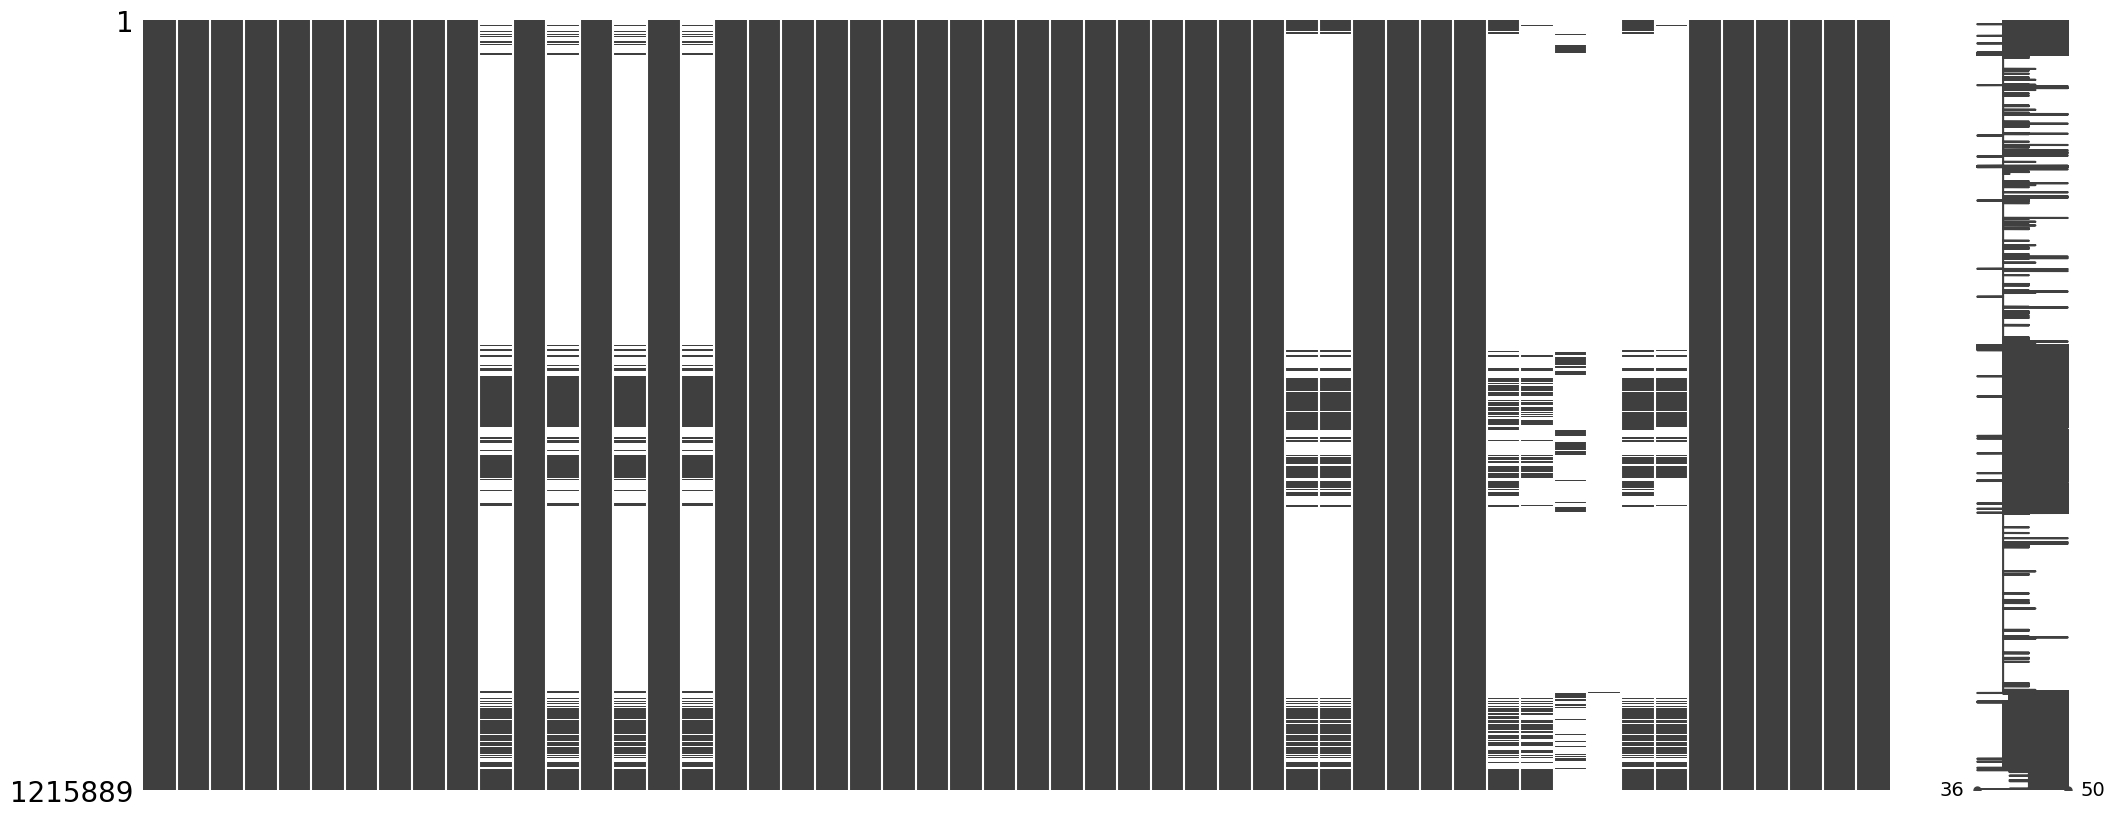

In [66]:
# Nullity matrix

msno.matrix(df)

<Axes: >

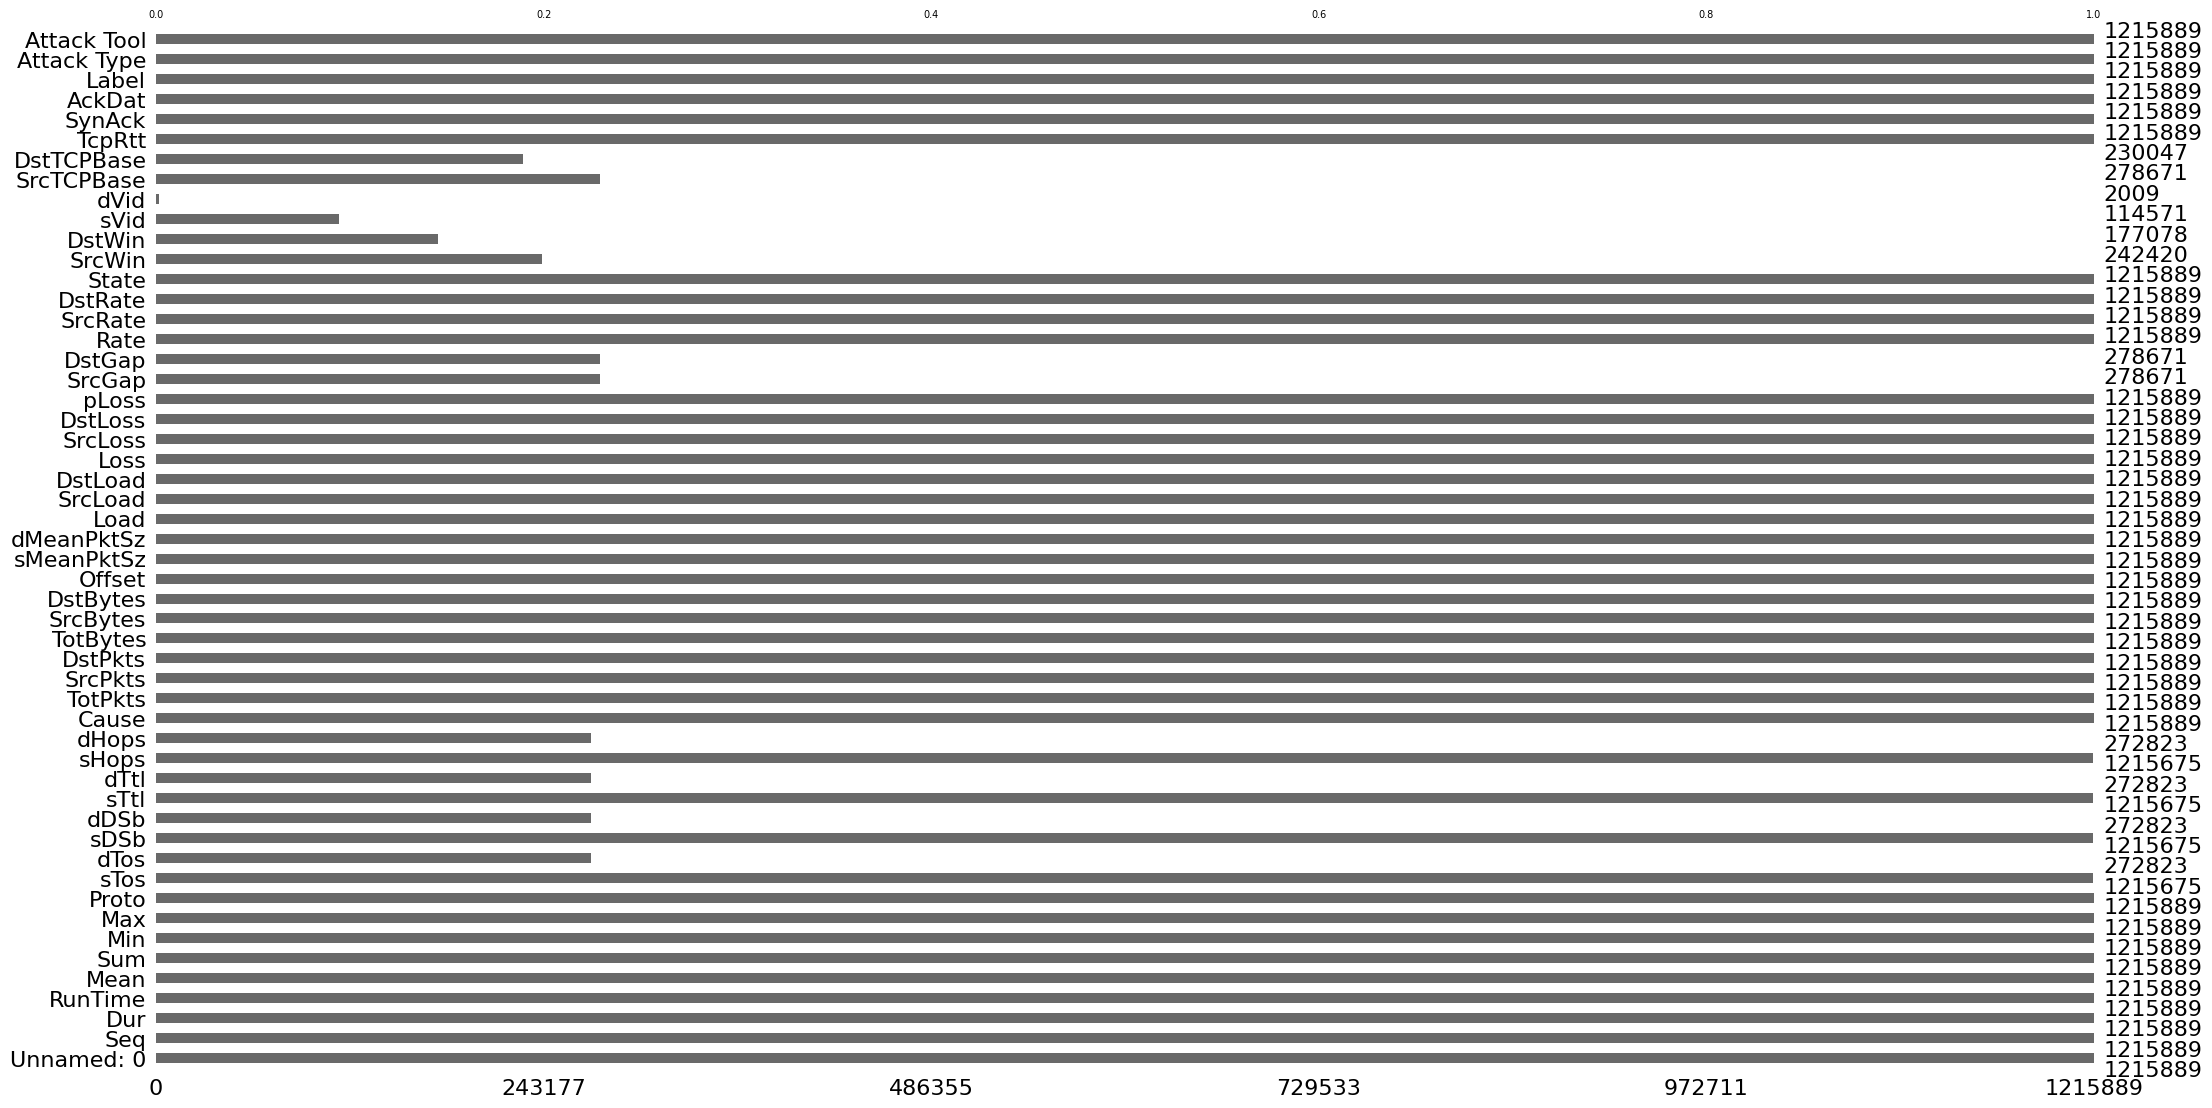

In [67]:
msno.bar(df) 

<Axes: >

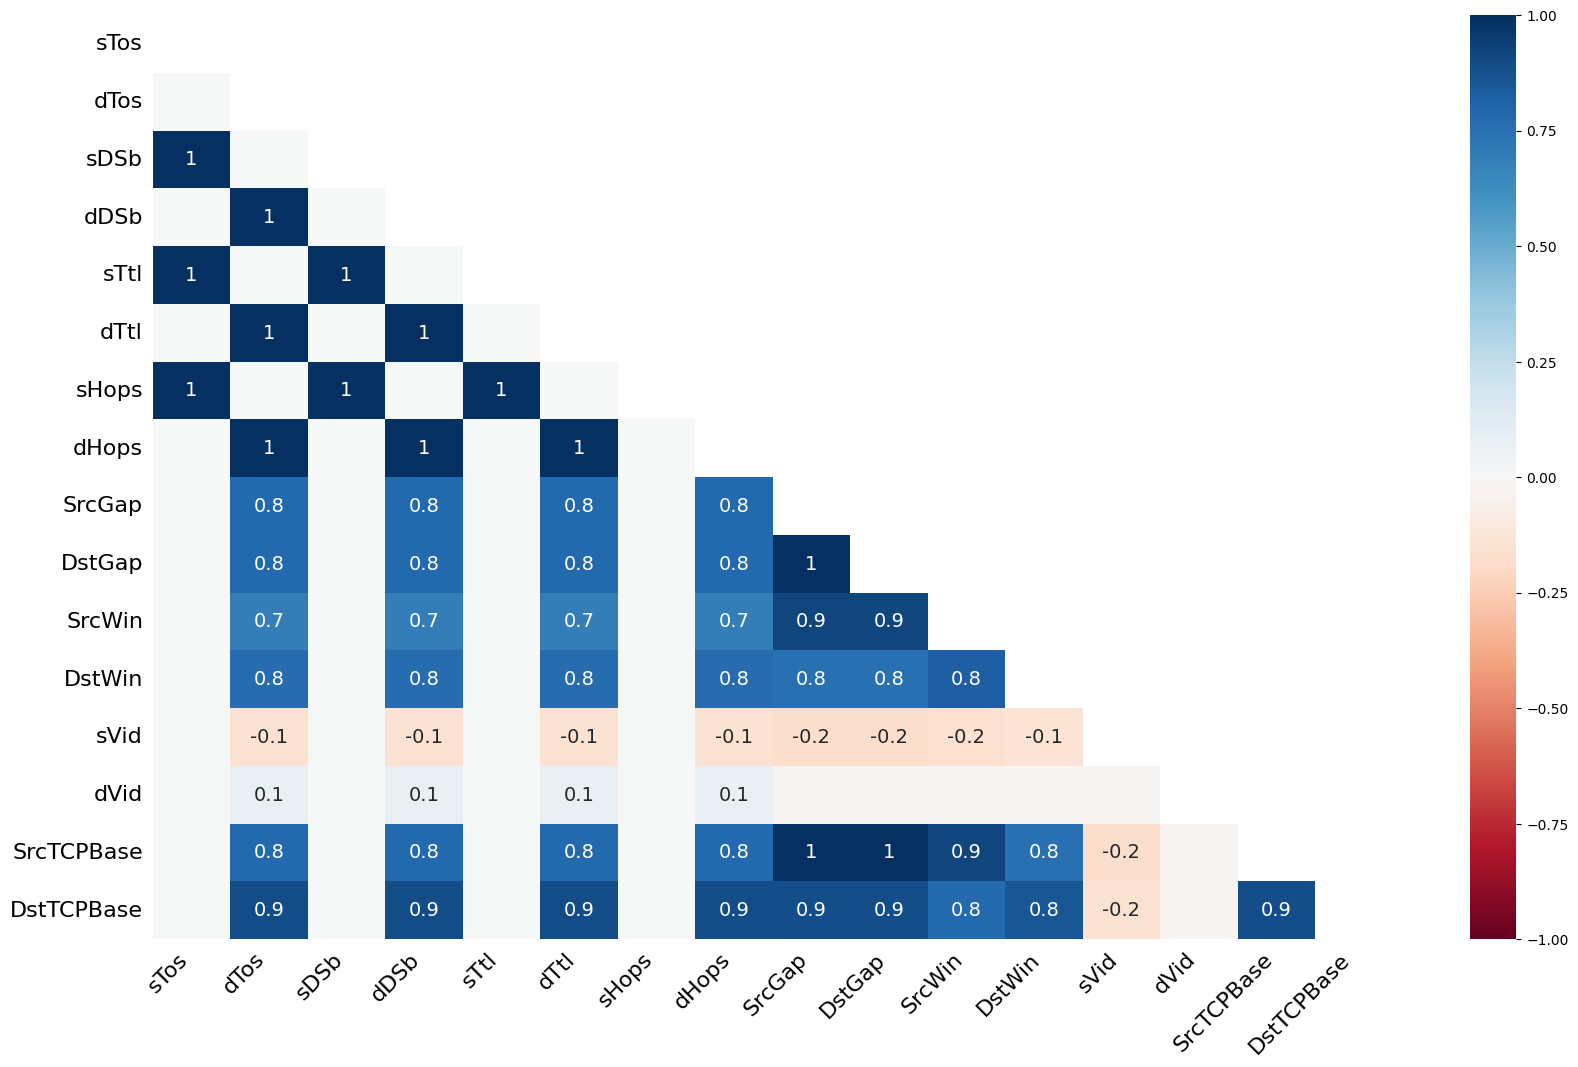

In [68]:
msno.heatmap(df)

The redder the color, lesser the correlation of missing values between columns, bluer the color, higher the correlation of missing values between columns

<Axes: >

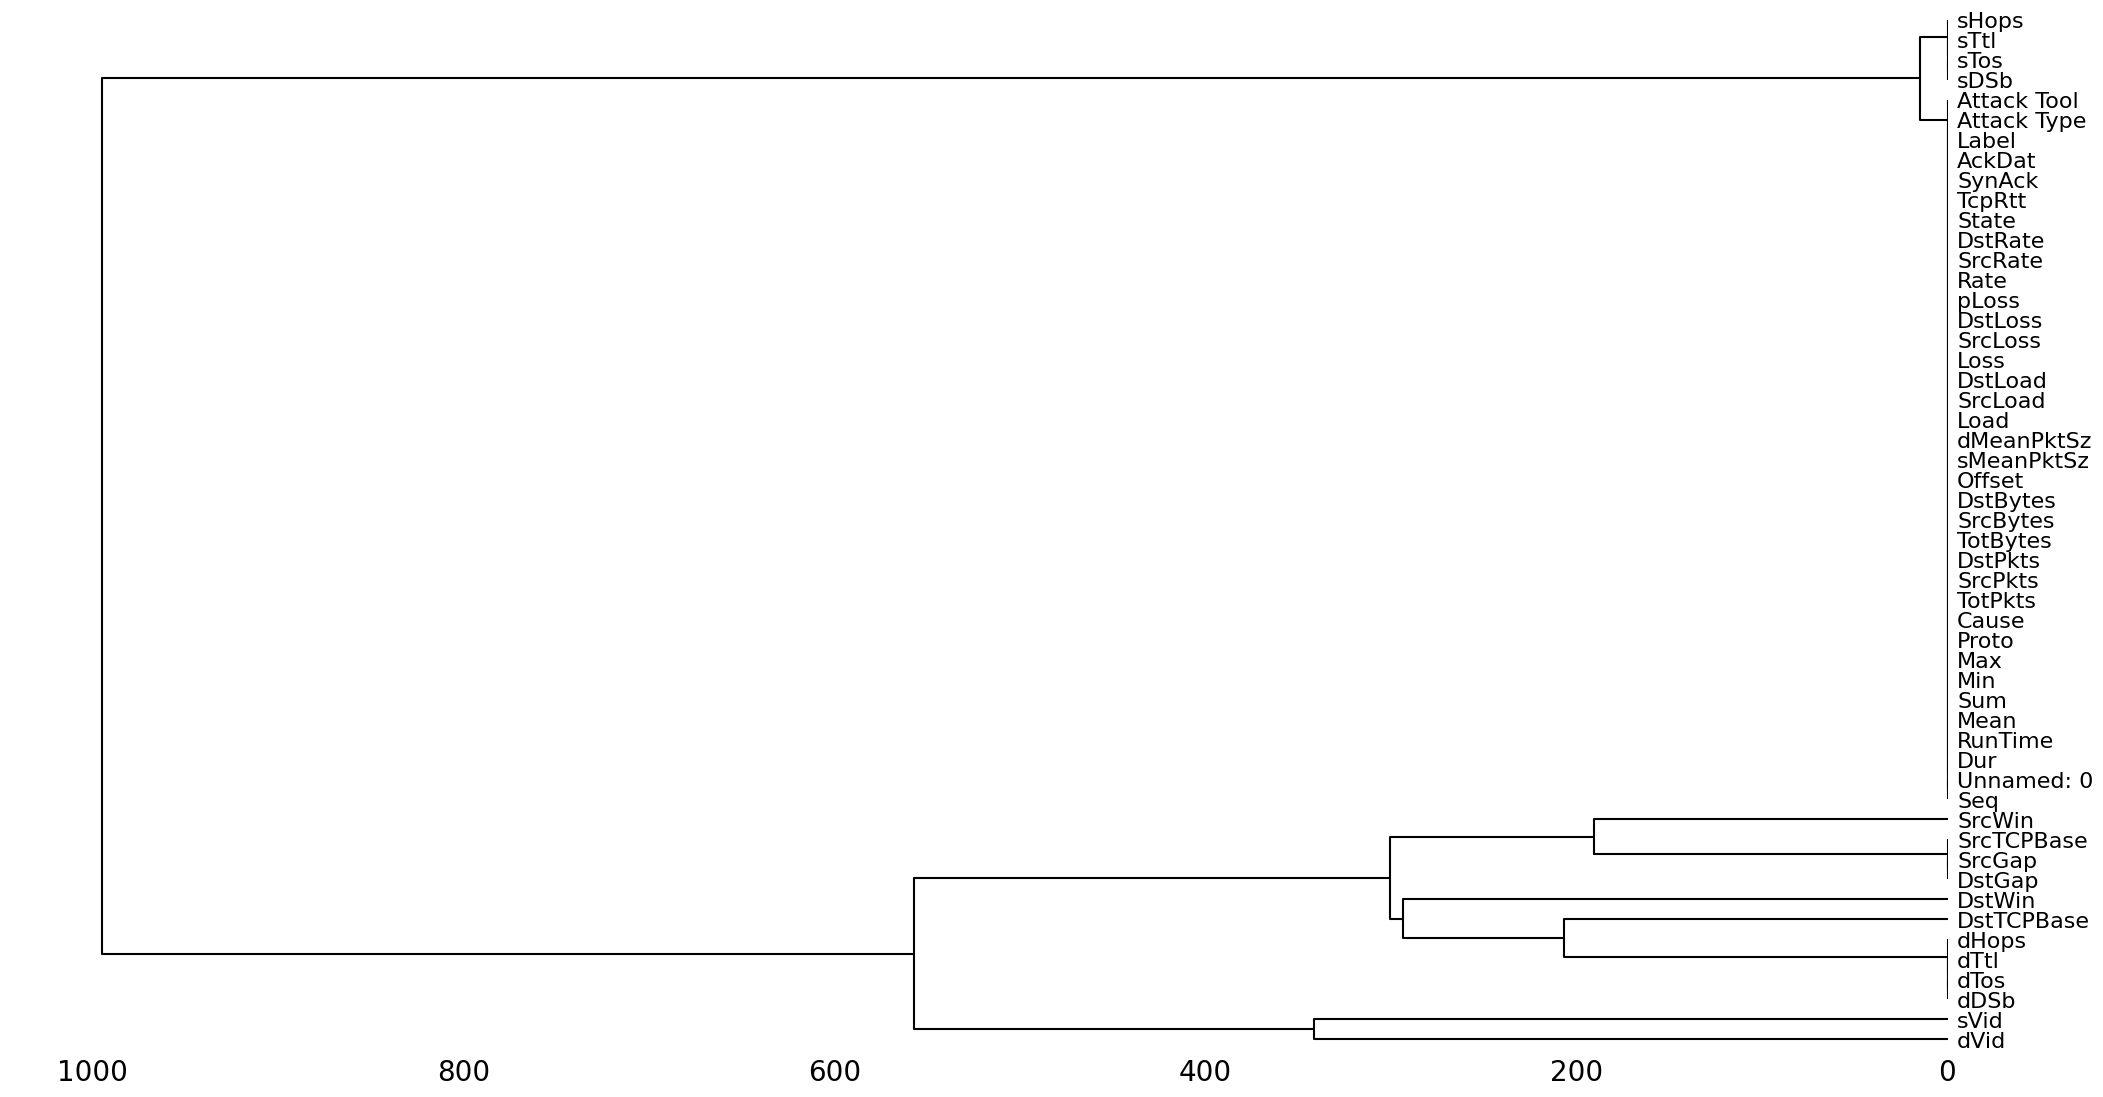

In [69]:
msno.dendrogram(df)

High Correlation => Missing Not At Random (MNAR)

Low Correlation => Missing Completely At Random (MCAR)

We can drop null rows, typically when values are missing completely at random (MCAR)

Conclusion -> sTos missing values can be dropped, 
since all missing values belong to Benign type, 
benign has multiple sTos, and sTos value of 0 has almost all types

sTos, sDSb, sTtl, sHops all have 214 missing values -> We can treat them similarly

We can drop the rows and not consider mode imputation, 
as each of sTos, sDSb, sTtl, sHops have different proportion of values

In [70]:
from fancyimpute import IterativeImputer

# Define a function to impute NaN values with the most frequent value in the group
def impute_most_frequent(group):
    mode_value = group.mode().iloc[0] if not group.mode().empty else np.nan
    return group.fillna(mode_value)

def handle_missing_values(df):
    df.drop_duplicates(inplace=True)
    df.drop(['sVid', 'dVid'], axis=1, inplace=True)
    df.dropna(subset=['sTos', 'sHops', 'sTtl', 'sDSb'], how='any', inplace=True)
    df[['dTtl', 'dDSb', 'dTos', 'dHops', 'SrcGap', 'DstGap']] = df.groupby('Attack Type')[['dTtl', 'dDSb', 'dTos', 'dHops', 'SrcGap', 'DstGap']].transform(impute_most_frequent)
    df['dDSb'] = df['dDSb'].fillna('cs0')
    
    df_subset_copy = df[['dTtl', 'dTos', 'dHops', 'SrcGap', 'DstGap', 'SrcTCPBase', 'DstTCPBase', 'SrcWin', 'DstWin']].copy(deep=True)
    mice_imputer = IterativeImputer()
    df_subset_copy.iloc[:, :] = mice_imputer.fit_transform(df_subset_copy)
    df[['dTtl', 'dTos', 'dHops', 'SrcGap', 'DstGap', 'SrcTCPBase', 'DstTCPBase', 'SrcWin', 'DstWin']] = df_subset_copy
    
handle_missing_values(df)
df.isna().any()

Unnamed: 0     False
Seq            False
Dur            False
RunTime        False
Mean           False
Sum            False
Min            False
Max            False
Proto          False
sTos           False
dTos           False
sDSb           False
dDSb           False
sTtl           False
dTtl           False
sHops          False
dHops          False
Cause          False
TotPkts        False
SrcPkts        False
DstPkts        False
TotBytes       False
SrcBytes       False
DstBytes       False
Offset         False
sMeanPktSz     False
dMeanPktSz     False
Load           False
SrcLoad        False
DstLoad        False
Loss           False
SrcLoss        False
DstLoss        False
pLoss          False
SrcGap         False
DstGap         False
Rate           False
SrcRate        False
DstRate        False
State          False
SrcWin         False
DstWin         False
SrcTCPBase     False
DstTCPBase     False
TcpRtt         False
SynAck         False
AckDat         False
Label        